# Final Project Submission

Please fill out:
* Student name: James Savory
* Student pace: Part Time
* Scheduled project review date/time: August 30, 2019
* Instructor name: Brandon Lewis
* Blog post URL: https://jsavory-94.github.io/lorem_ipsum

# I. Project Aim

The problem aimed at being solved in this analysis is 'Which statistical Categories have the most bearing on whether or not an NBA player makes an all-star team?'

# II. Table Of Contents
The contents of our notebook will be structured using the OSEMN framework. 

1. [Obtaining the Data](#1) <br>
2. [Scrubbing the Data](#2) <br>
3. [Exploring the Data](#3) <br>
4. [Modeling the Data](#4) <br>
5. [Interpreting the Data](#5) <br>


# III. Import Libraries

In [82]:
import pandas as pd #pandas for DataFrames etc.
import numpy as np #numpy for any type of array arithmatic etc.
import matplotlib.pyplot as plt #matplotlib for graphs etc.
import seaborn as sns #seaborn for heatmap graphs
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #sklearn modeling packages
import seaborn as sns
import pylab

from sklearn.cluster import KMeans #sklearn modeling packages
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#sklearn metric/pipeline/preprocessing/decomposition packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import operator
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
# 1. Obtaining the data

In [2]:
raw_df = pd.read_excel('mod5-project-dataset.xlsx')
raw_df

,"Data sourced from: https://www.basketball-reference.com/leagues/NBA_2018.html, https://www.basketball-reference.com/leagues/NBA_2019 .html",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,** All-Star column added manually. Data source...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,ALL-STAR
4,Giannis Antetokounmpo,24,72,72,32.8,10,17.3,0.578,0.7,2.8,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,1
5,Khris Middleton,27,77,77,31.1,6.6,14.9,0.441,2.3,6.2,...,0.6,5.3,6,4.3,1,0.1,2.3,2.2,18.3,1
6,Eric Bledsoe,29,78,78,29.1,6,12.4,0.484,1.6,4.8,...,1.1,3.6,4.6,5.5,1.5,0.4,2.1,2,15.9,0
7,Brook Lopez,30,81,81,28.7,4.4,9.7,0.452,2.3,6.3,...,0.4,4.5,4.9,1.2,0.6,2.2,1,2.3,12.5,0
8,Malcolm Brogdon,26,64,64,28.6,5.9,11.7,0.505,1.6,3.8,...,1,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,0
9,Nikola MirotiÄ‡,27,14,3,22.9,4,9.6,0.415,2.2,6.2,...,1,4.4,5.4,1.4,0.7,0.6,0.8,1.5,11.6,0


The data is quite messy and needs to be scrubbed before it can be used for modelling.

<a id="1"></a>
# 2. Scrubbing the data

### 2.1 Structure Dataframe

In [3]:
raw_df = raw_df.iloc[3:]
header = raw_df.iloc[0]
raw_df = raw_df.rename(columns=raw_df.iloc[0])
raw_df = raw_df.iloc[1:]
df = raw_df

df

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,ALL-STAR
4,Giannis Antetokounmpo,24,72,72,32.8,10,17.3,0.578,0.7,2.8,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,1
5,Khris Middleton,27,77,77,31.1,6.6,14.9,0.441,2.3,6.2,...,0.6,5.3,6,4.3,1,0.1,2.3,2.2,18.3,1
6,Eric Bledsoe,29,78,78,29.1,6,12.4,0.484,1.6,4.8,...,1.1,3.6,4.6,5.5,1.5,0.4,2.1,2,15.9,0
7,Brook Lopez,30,81,81,28.7,4.4,9.7,0.452,2.3,6.3,...,0.4,4.5,4.9,1.2,0.6,2.2,1,2.3,12.5,0
8,Malcolm Brogdon,26,64,64,28.6,5.9,11.7,0.505,1.6,3.8,...,1,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,0
9,Nikola MirotiÄ‡,27,14,3,22.9,4,9.6,0.415,2.2,6.2,...,1,4.4,5.4,1.4,0.7,0.6,0.8,1.5,11.6,0
10,Pat Connaughton,26,61,2,20.7,2.7,5.7,0.466,1.1,3.3,...,1,3.2,4.2,2,0.5,0.4,0.5,1.3,6.9,0
11,George Hill,32,47,0,20.4,2.4,5.7,0.428,0.7,2.7,...,0.6,2,2.6,2.1,0.9,0.1,0.7,1.4,6.8,0
12,D.J. Wilson,22,48,3,18.4,2.2,5.2,0.414,1,2.6,...,0.9,3.7,4.6,1.1,0.4,0.4,0.7,1.8,5.8,0
13,Ersan Ä°lyasova,31,67,7,18.4,2.5,5.7,0.438,0.9,2.4,...,1.4,3.1,4.5,0.8,0.5,0.3,0.7,2.6,6.8,0


We have blank columns in the dataframe that need to be dropped.

### 2.2 Manage Missing Data (Null Values)

In [4]:
df.isna().sum()

Player        0
Age           0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          10
3P            0
3PA           0
3P%         109
2P            0
2PA           0
2P%          32
eFG%         10
FT            0
FTA           0
FT%          98
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS/G         0
ALL-STAR      0
dtype: int64

In [5]:
df.shape[0]

1261

In each of the offending columns, the NaNs represent less than 8.6% percent of our observations, therefore the offending rows can be dropped with minimal data loss.

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Player      0
Age         0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS/G       0
ALL-STAR    0
dtype: int64

NaNs are dropped

### 2.3 Manage Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 4 to 1264
Data columns (total 28 columns):
Player      1085 non-null object
Age         1085 non-null object
G           1085 non-null object
GS          1085 non-null object
MP          1085 non-null object
FG          1085 non-null object
FGA         1085 non-null object
FG%         1085 non-null object
3P          1085 non-null object
3PA         1085 non-null object
3P%         1085 non-null object
2P          1085 non-null object
2PA         1085 non-null object
2P%         1085 non-null object
eFG%        1085 non-null object
FT          1085 non-null object
FTA         1085 non-null object
FT%         1085 non-null object
ORB         1085 non-null object
DRB         1085 non-null object
TRB         1085 non-null object
AST         1085 non-null object
STL         1085 non-null object
BLK         1085 non-null object
TOV         1085 non-null object
PF          1085 non-null object
PTS/G       1085 non-null object
AL

Oddly, all columns are of type object. 

Let's go ahead and convert the columns into their appropriate types.

In [9]:
#Categorical
df['Player'] = df['Player'].astype('category')

#Integer
df['Age'] = df['Age'].astype('int64')
df['G'] = df['G'].astype('int64')
df['GS'] = df['GS'].astype('int64')

#Float
df['MP'] = df['MP'].astype('float64')
df['FG'] = df['FG'].astype('float64')
df['FGA'] = df['FGA'].astype('float64')
df['FG%'] = df['FG%'].astype('float64')
df['3P'] = df['3P'].astype('float64')
df['3PA'] = df['3PA'].astype('float64')
df['3P%'] = df['3P%'].astype('float64')
df['2P'] = df['2P'].astype('float64')
df['2PA'] = df['2PA'].astype('float64')
df['2P%'] = df['2P%'].astype('float64')
df['eFG%'] = df['eFG%'].astype('float64')
df['FT'] = df['FT'].astype('float64')
df['FTA'] = df['FTA'].astype('float64')
df['FT%'] = df['FT%'].astype('float64')
df['ORB'] = df['ORB'].astype('float64')
df['DRB'] = df['DRB'].astype('float64')
df['TRB'] = df['TRB'].astype('float64')
df['AST'] = df['AST'].astype('float64')
df['STL'] = df['STL'].astype('float64')
df['BLK'] = df['BLK'].astype('float64')
df['TOV'] = df['TOV'].astype('float64')
df['PF'] = df['PF'].astype('float64')
df['PTS/G'] = df['PTS/G'].astype('float64')

#Boolean
df['ALL-STAR'] = df['ALL-STAR'].astype('bool')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 4 to 1264
Data columns (total 28 columns):
Player      1085 non-null category
Age         1085 non-null int64
G           1085 non-null int64
GS          1085 non-null int64
MP          1085 non-null float64
FG          1085 non-null float64
FGA         1085 non-null float64
FG%         1085 non-null float64
3P          1085 non-null float64
3PA         1085 non-null float64
3P%         1085 non-null float64
2P          1085 non-null float64
2PA         1085 non-null float64
2P%         1085 non-null float64
eFG%        1085 non-null float64
FT          1085 non-null float64
FTA         1085 non-null float64
FT%         1085 non-null float64
ORB         1085 non-null float64
DRB         1085 non-null float64
TRB         1085 non-null float64
AST         1085 non-null float64
STL         1085 non-null float64
BLK         1085 non-null float64
TOV         1085 non-null float64
PF          1085 non-null float64
PTS/G       10

### 2.4 Manage Missing Data (Filler Values)

We will manage filler values by inspecting the unique values of each column and keeping an eye out for any oddities

In [11]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


def display_unique_column_vals(df):
    columns = df.columns
    
    for c in columns:
        print(f'-----{c}-----') #column name
        print(np.array(df[c].unique())) #unique column vals
        print('\n') #newline
    

In [12]:
display_unique_column_vals(df)

-----Player-----
['Giannis Antetokounmpo' 'Khris Middleton' 'Eric Bledsoe' 'Brook Lopez'
 'Malcolm Brogdon' 'Nikola MirotiÄ‡' 'Pat Connaughton' 'George Hill'
 'D.J. Wilson' 'Ersan Ä°lyasova' 'Sterling Brown' 'Tony Snell'
 'Tim Frazier' 'Donte DiVincenzo' 'John Henson' 'Bonzie Colson'
 'Thon Maker' 'Pau Gasol' 'Matthew Dellavedova' 'Jaylen Morris'
 'Jason Smith' 'Christian Wood' 'Kyle Lowry' 'Kawhi Leonard'
 'Pascal Siakam' 'Danny Green' 'Fred VanVleet' 'Serge Ibaka' 'Marc Gasol'
 'OG Anunoby' 'Jeremy Lin' 'Jonas ValanÄﾍiÅ«nas' 'Norman Powell'
 'Delon Wright' 'C.J. Miles' 'Patrick McCaw' 'Jodie Meeks' 'Greg Monroe'
 'Lorenzo Brown' 'Malcolm Miller' 'Chris Boucher' 'Malachi Richardson'
 'Jordan Loyd' 'Tobias Harris' 'Ben Simmons' 'Robert Covington'
 'Joel Embiid' 'Jimmy Butler' 'J.J. Redick' 'Dario Å ariÄ‡'
 'Wilson Chandler' 'Mike Scott' 'Markelle Fultz' 'Mike Muscala'
 'Landry Shamet' 'Corey Brewer' 'T.J. McConnell' 'Zhaire Smith'
 'James Ennis' 'Jonathon Simmons' 'Jonah Bolden' 'Furka

The only noticable oddity are player names such as  ' Dario Å ariÄ‡'. At first glance they give the impression of a filler value but upon closer inspection these are the result of mangled special characters, not fillers.

Encouragingly nothing else appears out of the ordinary so we can progress in our data scrubbing with our data now fully audited for missing values.

### 2.5 Manage Multicollinearity

In [13]:
def heatmap(df): #basic heatmap correlation matrix
    corrmat = df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20)) #plot heat map
    g=sns.heatmap(round(df[top_corr_features].corr(),2),annot=True,cmap="RdYlGn")

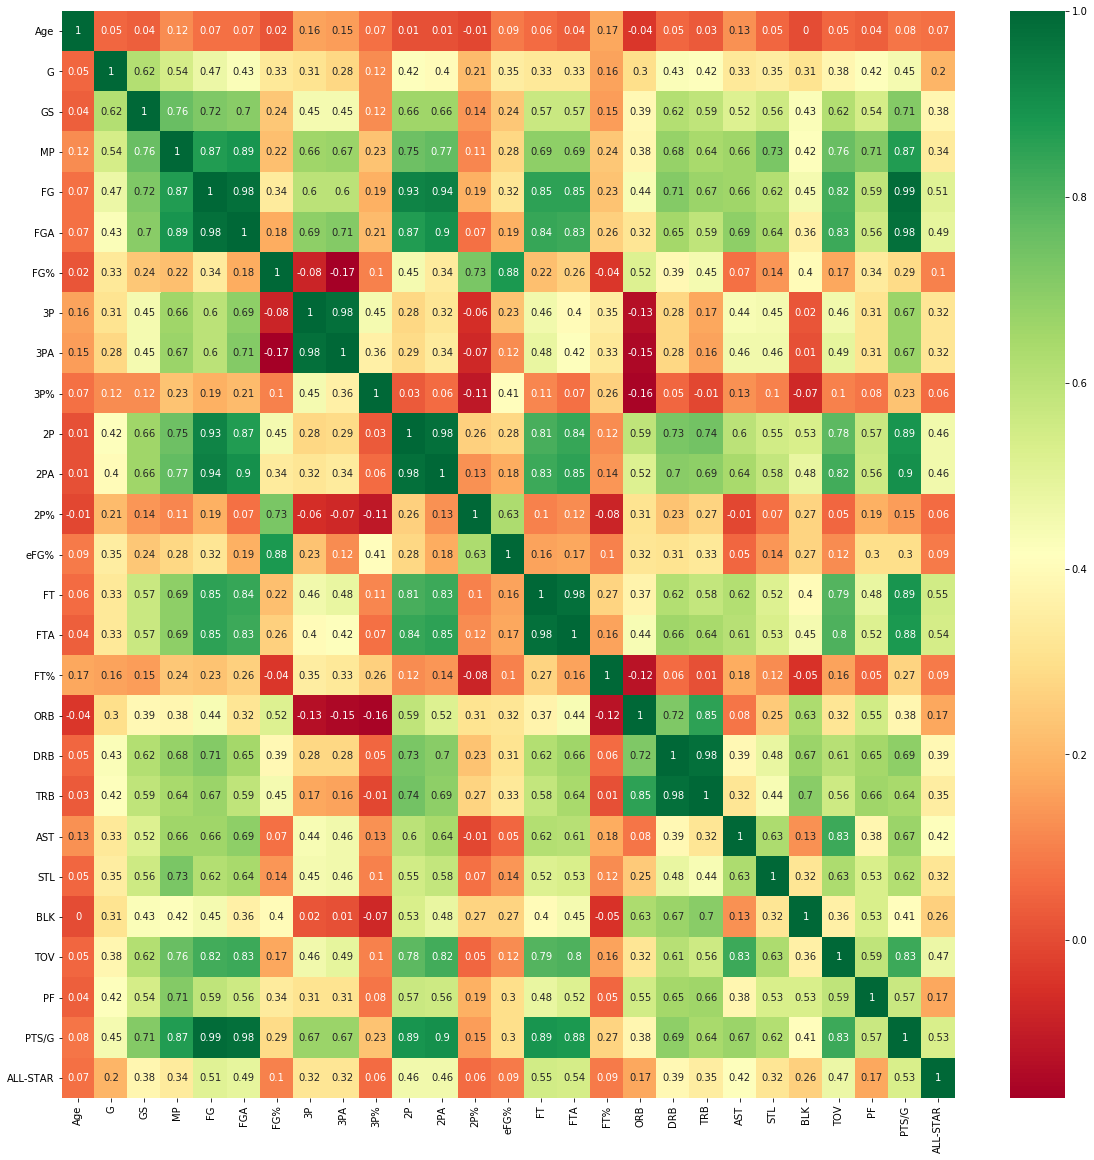

In [14]:
heatmap(df)

There is substantial multicollinearity in our features.

There are many reasons for this including:
- double counting (e.g. field goals made and two pointers made, offensive/defensive rebounds & total rebounds)
- stats that are functions of one another  (e.g. free throws attempted and free throws made)

These will be the ones we remove.

In [15]:
multicollinear_offenders = ['FG','FGA','2PA','3PA','FTA','TRB','PTS/G']

df = df.drop(multicollinear_offenders, axis=1)
df

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,...,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
4,Giannis Antetokounmpo,24,72,72,32.8,0.578,0.7,0.256,9.3,0.641,...,6.9,0.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,True
5,Khris Middleton,27,77,77,31.1,0.441,2.3,0.378,4.2,0.485,...,2.8,0.837,0.6,5.3,4.3,1.0,0.1,2.3,2.2,True
6,Eric Bledsoe,29,78,78,29.1,0.484,1.6,0.329,4.4,0.582,...,2.3,0.750,1.1,3.6,5.5,1.5,0.4,2.1,2.0,False
7,Brook Lopez,30,81,81,28.7,0.452,2.3,0.365,2.1,0.613,...,1.4,0.842,0.4,4.5,1.2,0.6,2.2,1.0,2.3,False
8,Malcolm Brogdon,26,64,64,28.6,0.505,1.6,0.426,4.3,0.544,...,2.2,0.928,1.0,3.5,3.2,0.7,0.2,1.4,1.6,False
9,Nikola MirotiÄ‡,27,14,3,22.9,0.415,2.2,0.356,1.8,0.521,...,1.4,0.870,1.0,4.4,1.4,0.7,0.6,0.8,1.5,False
10,Pat Connaughton,26,61,2,20.7,0.466,1.1,0.330,1.6,0.647,...,0.5,0.725,1.0,3.2,2.0,0.5,0.4,0.5,1.3,False
11,George Hill,32,47,0,20.4,0.428,0.7,0.280,1.7,0.556,...,1.1,0.815,0.6,2.0,2.1,0.9,0.1,0.7,1.4,False
12,D.J. Wilson,22,48,3,18.4,0.414,1.0,0.362,1.2,0.468,...,0.5,0.553,0.9,3.7,1.1,0.4,0.4,0.7,1.8,False
13,Ersan Ä°lyasova,31,67,7,18.4,0.438,0.9,0.363,1.6,0.493,...,0.9,0.824,1.4,3.1,0.8,0.5,0.3,0.7,2.6,False


### 2.6 Feature Scale

In [16]:
def scale_df(df): #Simple function to easily be able to scale my data at any point
    scaler= StandardScaler()
    scaled_df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return scaled_df

In [17]:
X = df.ix[:,1:-1]
X = scale_df(X)
X

,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
0,-0.523466,0.959439,1.795018,1.415040,1.728537,-0.311572,-0.441899,3.893835,1.500000,1.211460,4.273483,-0.143892,1.969466,4.224540,2.240152,1.513993,2.962424,3.259466,1.973273
1,0.190950,1.154747,1.976828,1.217978,0.009897,1.705163,0.481742,1.018395,-0.106390,0.200950,1.073693,0.636540,-0.270000,1.406275,1.315807,0.804309,-0.751609,1.477010,0.605920
2,0.667228,1.193808,2.013191,0.986141,0.549324,0.822842,0.110771,1.131157,0.892455,0.567260,0.683475,0.007859,0.429833,0.448065,2.009066,1.987116,0.044255,1.222373,0.332449
3,0.905366,1.310993,2.122277,0.939774,0.147890,1.705163,0.383321,-0.165610,1.211674,0.857781,-0.018917,0.672671,-0.549933,0.955353,-0.475111,-0.141937,4.819440,-0.178128,0.742655
4,-0.047189,0.646946,1.504120,0.928182,0.812765,0.822842,0.845142,1.074776,0.501155,0.908307,0.605432,1.294126,0.289866,0.391700,0.680320,0.094625,-0.486321,0.331145,-0.214492
5,0.190950,-1.306133,-0.713972,0.267446,-0.316268,1.579117,0.315184,-0.334754,0.264315,0.339895,-0.018917,0.875005,0.289866,0.898987,-0.359568,0.094625,0.574832,-0.432765,-0.351227
6,-0.047189,0.529761,-0.750334,0.012425,0.323517,0.192612,0.118342,-0.447516,1.561785,0.718836,-0.721310,-0.172797,0.289866,0.222604,-0.012939,-0.378498,0.044255,-0.814720,-0.624698
7,1.381644,-0.017101,-0.823059,-0.022350,-0.153185,-0.311572,-0.260199,-0.391135,0.624723,-0.127466,-0.253048,0.477563,-0.270000,-0.453780,0.044833,0.567747,-0.751609,-0.560083,-0.487962
8,-0.999744,0.021961,-0.713972,-0.254188,-0.328813,0.066566,0.360609,-0.673041,-0.281446,0.036742,-0.721310,-1.415706,0.149900,0.504430,-0.532883,-0.615060,0.044255,-0.560083,0.058979
9,1.143505,0.764131,-0.568523,-0.254188,-0.027737,-0.059480,0.368180,-0.447516,-0.024011,0.137793,-0.409136,0.542599,0.849733,0.166239,-0.706197,-0.378498,-0.221033,-0.560083,1.152861


# 3.0 Explore

We will look to posit an idea of how player performance varies from all-star to non all-star by looking at the distribution of each.

## 3.1 All-Stars

In [28]:
pd.options.display.max_columns = 999

all_star = df[df['ALL-STAR']==True]
all_star

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
4,Giannis Antetokounmpo,24,72,72,32.8,0.578,0.7,0.256,9.3,0.641,0.599,6.9,0.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,True
5,Khris Middleton,27,77,77,31.1,0.441,2.3,0.378,4.2,0.485,0.519,2.8,0.837,0.6,5.3,4.3,1.0,0.1,2.3,2.2,True
29,Kawhi Leonard,27,60,60,34.0,0.496,1.9,0.371,7.5,0.542,0.546,6.1,0.854,1.3,6.0,3.3,1.8,0.4,2.0,1.5,True
51,Ben Simmons,22,79,79,34.2,0.563,0.0,0.000,6.8,0.566,0.563,3.3,0.600,2.2,6.6,7.7,1.4,0.8,3.5,2.6,True
53,Joel Embiid,24,64,64,33.7,0.484,1.2,0.300,7.8,0.535,0.517,8.2,0.804,2.5,11.1,3.7,0.7,1.9,3.5,3.3,True
76,Kyrie Irving,26,67,67,33.0,0.487,2.6,0.401,6.4,0.533,0.557,3.2,0.873,1.1,3.9,6.9,1.5,0.5,2.6,2.5,True
93,Victor Oladipo,26,36,36,31.9,0.423,2.1,0.343,4.9,0.470,0.486,2.9,0.730,0.6,5.0,5.2,1.7,0.3,2.3,2.0,True
111,D'Angelo Russell,22,81,81,30.2,0.434,2.9,0.369,5.2,0.482,0.512,2.0,0.780,0.7,3.2,7.0,1.2,0.2,3.1,1.7,True
131,Nikola VuÄﾍeviÄ‡,28,80,80,31.4,0.518,1.1,0.364,7.7,0.549,0.549,2.2,0.789,2.8,9.2,3.8,1.0,1.1,2.0,2.0,True
146,Blake Griffin,29,75,75,35.0,0.462,2.5,0.362,5.7,0.525,0.532,5.5,0.753,1.3,6.2,5.4,0.7,0.4,3.4,2.7,True


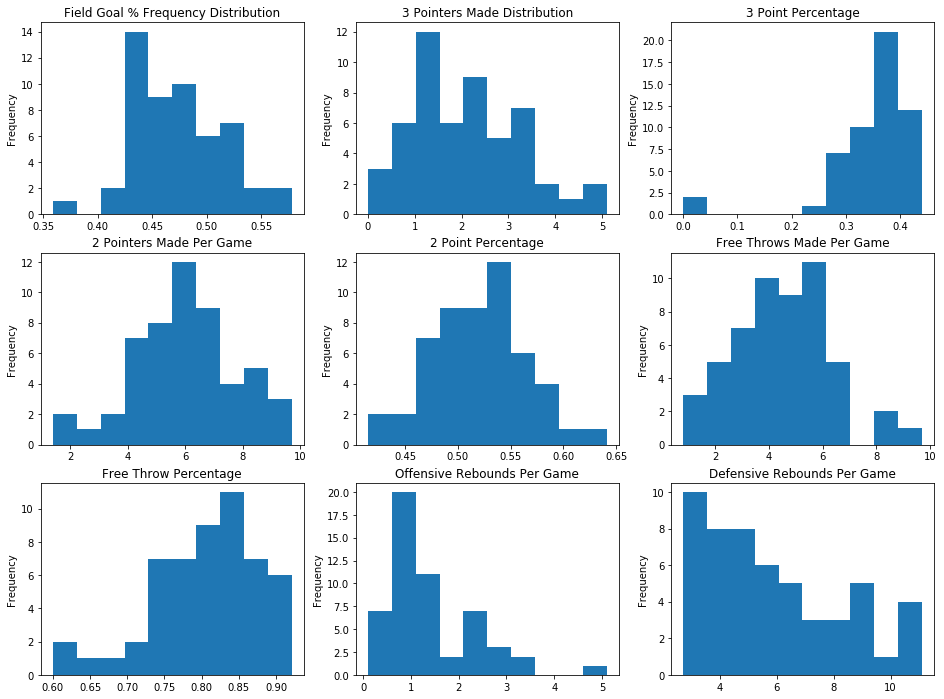

In [85]:
def plot_histograms(df):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(331)
    ax.set_title("Field Goal % Frequency Distribution")
    df['FG%'].plot.hist()

    ax1 = plt.subplot(332)
    ax1.set_title("3 Pointers Made Distribution")
    df['3P'].plot.hist()

    ax2 = plt.subplot(333)
    ax2.set_title("3 Point Percentage")
    df['3P%'].plot.hist()

    ax3 = plt.subplot(334)
    ax3.set_title('2 Pointers Made Per Game')
    df['2P'].plot.hist()

    ax4 = plt.subplot(335)
    ax4.set_title('2 Point Percentage')
    df['2P%'].plot.hist()

    ax5 = plt.subplot(336)
    ax5.set_title('Free Throws Made Per Game')
    df['FT'].plot.hist()

    ax6 = plt.subplot(337)
    ax6.set_title('Free Throw Percentage')
    df['FT%'].plot.hist()

    ax7 = plt.subplot(338)
    ax7.set_title('Offensive Rebounds Per Game')
    df['ORB'].plot.hist()

    ax8 = plt.subplot(339)
    ax8.set_title('Defensive Rebounds Per Game')
    df['DRB'].plot.hist()
    
plot_histograms(all_star)

## 3.2 Non All-Star

In [74]:
non_all_star = df[df['ALL-STAR']==False]
non_all_star

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
6,Eric Bledsoe,29,78,78,29.1,0.484,1.6,0.329,4.4,0.582,0.548,2.3,0.750,1.1,3.6,5.5,1.5,0.4,2.1,2.0,False
7,Brook Lopez,30,81,81,28.7,0.452,2.3,0.365,2.1,0.613,0.571,1.4,0.842,0.4,4.5,1.2,0.6,2.2,1.0,2.3,False
8,Malcolm Brogdon,26,64,64,28.6,0.505,1.6,0.426,4.3,0.544,0.575,2.2,0.928,1.0,3.5,3.2,0.7,0.2,1.4,1.6,False
9,Nikola MirotiÄ‡,27,14,3,22.9,0.415,2.2,0.356,1.8,0.521,0.530,1.4,0.870,1.0,4.4,1.4,0.7,0.6,0.8,1.5,False
10,Pat Connaughton,26,61,2,20.7,0.466,1.1,0.330,1.6,0.647,0.560,0.5,0.725,1.0,3.2,2.0,0.5,0.4,0.5,1.3,False
11,George Hill,32,47,0,20.4,0.428,0.7,0.280,1.7,0.556,0.493,1.1,0.815,0.6,2.0,2.1,0.9,0.1,0.7,1.4,False
12,D.J. Wilson,22,48,3,18.4,0.414,1.0,0.362,1.2,0.468,0.506,0.5,0.553,0.9,3.7,1.1,0.4,0.4,0.7,1.8,False
13,Ersan Ä°lyasova,31,67,7,18.4,0.438,0.9,0.363,1.6,0.493,0.514,0.9,0.824,1.4,3.1,0.8,0.5,0.3,0.7,2.6,False
14,Sterling Brown,23,58,7,17.8,0.465,0.9,0.361,1.6,0.558,0.550,0.5,0.690,0.5,2.7,1.4,0.4,0.1,0.8,1.5,False
15,Tony Snell,27,74,12,17.6,0.452,1.1,0.397,1.1,0.522,0.564,0.5,0.881,0.4,1.7,0.9,0.4,0.2,0.3,1.2,False


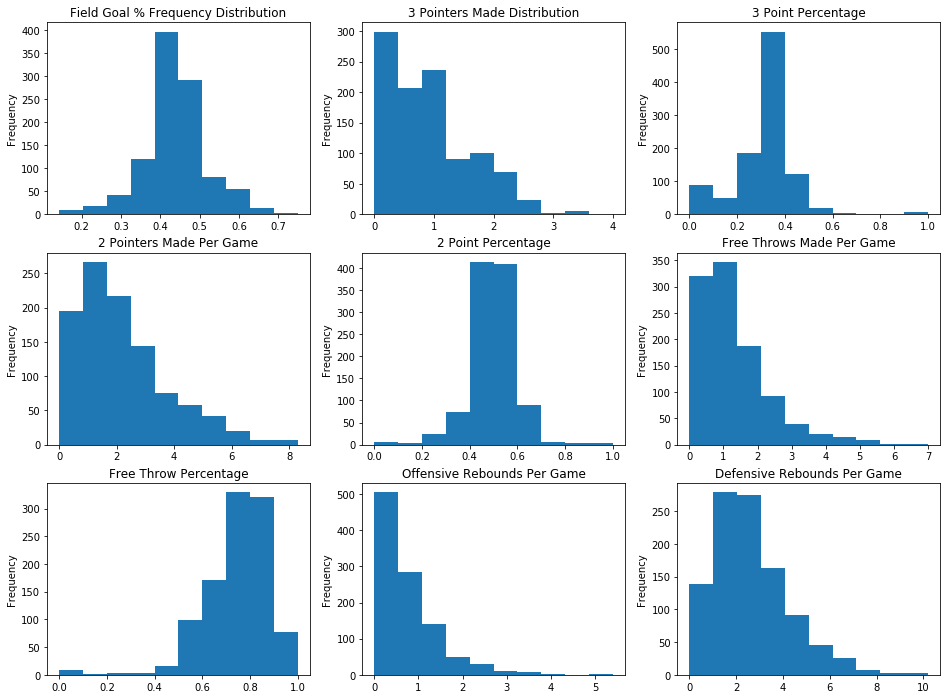

In [76]:
plot_histograms(non_all_star)

Noticeable discrepancies include:

#### Two pointers made per game
For All-Stars the category is distributed approximately normally around the mode of 6 two-point field goals made. <br>
For Non All-Stars the category is negatively skewed around the mode of 1 two-point field goal made per game.

#### Three pointers made per game
For All-Stars the category is positively skewed around the mean of 2.5 three point field goals made per game. <br>
For Non All-Stars the category is positively skewed around the mean of 1 three point field goal made per game.

#### Free throws made per game
For All-Stars the category is distributed approximately normally around the mode of 6 free throws made made. <br>
For Non All-Stars the category is negatively skewed around the mode of 1 free thwo made per game.

#### Offensive rebounds  per game
For All-Stars the category is distributed approximately normally around the mode of 1 offensive rebound per game. <br>
For Non All-Stars the category is negatively skewed around the mode of 0 offensive rebounds per game.

# 4.0 Model

In [21]:
y = raw_df['ALL-STAR'].values
y = y.astype('int')

In [22]:
def random_forest(df,X,y): #Random Forest model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    clf= RandomForestClassifier(random_state=0) #classifier defined
    clf.fit(X_train, y_train) #fitted data
    preds= clf.predict(X_test) #predictions of model using test data
    acc = round(accuracy_score(preds, y_test) * 100,2) #basic accuracy score
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Score']) #creating a list of top 10 features from RF model
    feat_importances = feat_importances.sort_values(by='Score',ascending=True) #sorting values
    feat_importances.plot(kind='barh') #plotting the features in a horizontal bar chart
    plt.show()
    pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix to show where the model predicted what positions
    
    Refined_X=feat_importances.index[-10:] #rerunning the model again this time using only the top 10 features
    X_key_features=df[Refined_X]

    X_train, X_test, y_train, y_test = train_test_split(X_key_features,y_key_features, test_size=.2)
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X_key_features.columns, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True)
    feat_importances.plot(kind='barh')
    plt.show()
    print(classification_report(y_test,preds))
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


In [23]:
def SVM(df,X,y): #Support Vector Machine Model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    svclassifier = SVC(kernel='linear') #defining classifier
    svclassifier.fit(X_train, y_train) #fitting SVM classifier
    y_pred = svclassifier.predict(X_test) #predicting y values using classifier and X_test
    pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix again
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification score with recall, precision, and F1 score

In [24]:
def ADABOOST(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #train test split
    adaboost_clf = AdaBoostClassifier() #adaboost classifier 
    adaboost_clf.fit(X_train, y_train) #fit the model
    y_pred= adaboost_clf.predict(X_test)#predict the value of y using X_test
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification report
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix

Accuracy is :95.85%


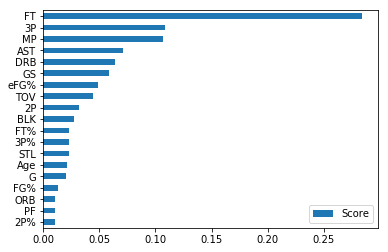

NameError: name 'y_key_features' is not defined

In [25]:
random_forest(df,X,y)

In [78]:
SVM(raw_df, X, y)

Accuracy is :97.24%
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       209
          1       0.62      0.62      0.62         8

avg / total       0.97      0.97      0.97       217



In [79]:
ADABOOST(X,y)

Accuracy is :96.77%
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       205
          1       0.73      0.67      0.70        12

avg / total       0.97      0.97      0.97       217



Predicted Result,0,1
Actual Result,,
0,202,3
1,4,8


Support Vector Machine provides the modelling fit for our data with 97.24% accuracy.

Our models predictions of Free Throws Taken and Three Pointers Made as the predominant drivers of all-star selection agree with the distributions produced in our EDA process.

# 5.0 Interpreting

In an attempt to interpret why our model selected the categories it did, we will look at the top 20 leaders in eachcategory and examine the talent level of the players.

#### Free Throws Made Leaders

In [1]:
# add year feature 

In [92]:
df_sorted_FT = df.sort_values(by=['FT'], ascending=False)
df_sorted_FT.iloc[:20]

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
391,James Harden,29,78,78,36.8,0.442,4.8,0.368,6.0,0.528,0.541,9.7,0.879,0.8,5.8,7.5,2.0,0.7,5.0,3.1,True
964,James Harden,28,72,72,35.4,0.449,3.7,0.367,5.4,0.531,0.541,8.7,0.858,0.6,4.8,8.8,1.8,0.7,4.4,2.3,True
53,Joel Embiid,24,64,64,33.7,0.484,1.2,0.300,7.8,0.535,0.517,8.2,0.804,2.5,11.1,3.7,0.7,1.9,3.5,3.3,True
887,Jeremy Lin,29,1,1,25.0,0.417,1.0,0.500,4.0,0.400,0.458,7.0,1.000,0.0,0.0,4.0,0.0,0.0,3.0,3.0,False
4,Giannis Antetokounmpo,24,72,72,32.8,0.578,0.7,0.256,9.3,0.641,0.599,6.9,0.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,True
1005,Damian Lillard,27,73,73,36.6,0.439,3.1,0.361,5.4,0.501,0.519,6.8,0.916,0.8,3.6,6.6,1.1,0.4,2.8,1.6,True
1059,Anthony Davis,24,75,75,36.4,0.534,0.7,0.340,9.7,0.558,0.552,6.6,0.828,2.5,8.6,2.3,1.5,2.6,2.2,2.1,True
781,Giannis Antetokounmpo,23,75,75,36.7,0.529,0.6,0.307,9.3,0.554,0.545,6.5,0.760,2.1,8.0,4.8,1.5,1.4,3.0,3.1,True
1099,Jimmy Butler,28,59,59,36.7,0.474,1.2,0.350,6.2,0.509,0.512,6.2,0.854,1.3,4.0,4.9,2.0,0.4,1.8,1.3,True
1060,DeMarcus Cousins,27,48,48,36.2,0.470,2.2,0.354,6.3,0.530,0.530,6.1,0.746,2.2,10.7,5.4,1.6,1.6,5.0,3.8,True


It's very clear why free throws made is such a strong predictor - with the exception of arguably Jeremy Lin, all players in this group are multifaceted scorers capable of manipulating defenses into committing fouls consistently.

#### 3 pointers made

In [95]:
df_sorted_3P = df.sort_values(by=['3P'], ascending=False)
df_sorted_3P.iloc[:20]

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
340,Stephen Curry,30,69,69,33.8,0.472,5.1,0.437,4.0,0.525,0.604,3.8,0.916,0.7,4.7,5.2,1.3,0.4,2.8,2.4,True
391,James Harden,29,78,78,36.8,0.442,4.8,0.368,6.0,0.528,0.541,9.7,0.879,0.8,5.8,7.5,2.0,0.7,5.0,3.1,True
991,Stephen Curry,29,51,51,32.0,0.495,4.2,0.423,4.2,0.595,0.618,5.5,0.921,0.7,4.4,6.1,1.6,0.2,3.0,2.2,True
81,R.J. Hunter,25,1,0,26.0,0.462,4.0,0.400,2.0,0.667,0.615,1.0,0.500,1.0,2.0,3.0,1.0,0.0,0.0,3.0,False
432,Paul George,28,77,77,36.9,0.438,3.8,0.386,5.4,0.484,0.529,5.9,0.839,1.4,6.8,4.1,2.2,0.4,2.7,2.8,True
964,James Harden,28,72,72,35.4,0.449,3.7,0.367,5.4,0.531,0.541,8.7,0.858,0.6,4.8,8.8,1.8,0.7,4.4,2.3,True
505,Buddy Hield,26,82,82,31.9,0.458,3.4,0.427,4.2,0.487,0.560,2.1,0.886,1.3,3.7,2.5,0.7,0.4,1.8,2.5,False
183,Kemba Walker,28,82,82,34.9,0.434,3.2,0.356,5.7,0.494,0.511,4.6,0.844,0.6,3.8,5.9,1.2,0.4,2.6,1.6,True
55,J.J. Redick,34,76,63,31.3,0.440,3.2,0.397,2.8,0.502,0.557,3.0,0.894,0.3,2.2,2.7,0.4,0.2,1.3,1.7,False
166,Kemba Walker,28,82,82,34.9,0.434,3.2,0.356,5.7,0.494,0.511,4.6,0.844,0.6,3.8,5.9,1.2,0.4,2.6,1.6,True


It is clear why 3 pointers made is a powerful predictor - three point ability is a major part of what makes top talents like Steph Curry, James Harden and Paul George successful.

It is likely not as powerful as free throws made because it also selecting for specialists who don't have much standout ability other than their outside shooting such as JJ Reddick, Wayne Ellington and R.J. Hunter.

#### Minutes Played

In [96]:
df_sorted_MP = df.sort_values(by=['MP'], ascending=False)
df_sorted_MP.iloc[:20]

,Player,Age,G,GS,MP,FG%,3P,3P%,2P,2P%,eFG%,FT,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,ALL-STAR
432,Paul George,28,77,77,36.9,0.438,3.8,0.386,5.4,0.484,0.529,5.9,0.839,1.4,6.8,4.1,2.2,0.4,2.7,2.8,True
721,LeBron James,33,82,82,36.9,0.542,1.8,0.367,8.6,0.603,0.590,4.7,0.731,1.2,7.5,9.1,1.4,0.9,4.2,1.7,True
219,Bradley Beal,25,82,82,36.9,0.475,2.5,0.351,6.8,0.548,0.540,4.4,0.808,1.1,3.9,5.5,1.5,0.7,2.7,2.8,True
391,James Harden,29,78,78,36.8,0.442,4.8,0.368,6.0,0.528,0.541,9.7,0.879,0.8,5.8,7.5,2.0,0.7,5.0,3.1,True
1099,Jimmy Butler,28,59,59,36.7,0.474,1.2,0.350,6.2,0.509,0.512,6.2,0.854,1.3,4.0,4.9,2.0,0.4,1.8,1.3,True
781,Giannis Antetokounmpo,23,75,75,36.7,0.529,0.6,0.307,9.3,0.554,0.545,6.5,0.760,2.1,8.0,4.8,1.5,1.4,3.0,3.1,True
1021,Paul George,27,79,79,36.6,0.430,3.1,0.401,4.2,0.454,0.521,4.3,0.822,0.9,4.7,3.3,2.0,0.5,2.7,2.9,True
1005,Damian Lillard,27,73,73,36.6,0.439,3.1,0.361,5.4,0.501,0.519,6.8,0.916,0.8,3.6,6.6,1.1,0.4,2.8,1.6,True
1059,Anthony Davis,24,75,75,36.4,0.534,0.7,0.340,9.7,0.558,0.552,6.6,0.828,2.5,8.6,2.3,1.5,2.6,2.2,2.1,True
1022,Russell Westbrook,29,80,80,36.4,0.449,1.2,0.298,8.3,0.485,0.477,5.2,0.737,1.9,8.2,10.3,1.8,0.3,4.8,2.5,True


This group contains the workhorses of the league who log the most minutes.

It makes sense that this category is a strong predictor, as coaches will obviously play their star players for as long as they can to have their best talent on floor.

It is likely not as powerful as free throws made because it is also selecting for high stamina players who don't necessarily have all-star level talent such as Jrue Holiday, Andrew Wiggins and Khris Middleton.

#### Conclusion

Free throws attempted was the most powerful predictor of whether or not a player becomes an all-star because of how all-encompassing it is. Consistently manipulating an opponent's defense into committing fouls requires the use of many skills such as ball handling, athleticism, and knowledge of opponent strategies and tendencies. 


With the exception of assists and minutes played, all other stats are unidimensional measures of a player's competency in only one particular area:
- 3P/3P% : how skillful an outside scorer a player is
- 2P/2P% : how skillful an inside scorer a player is
- ORB/DRB : how skillful a rebounder a player is
- STL: how skillful a player is at stealing the ball
- BLK: how skillful a player is at blocking shots



In [2]:
# Large paragraphs
# EDA, 
# Repetitive Code
# Yearly analysis